In [1]:
# https://pandas.pydata.org/pandas-docs/stable/10min.html
import pandas as pd

xls = pd.ExcelFile('reactions_and_metabolites_iCW773.xlsx')

reactions = xls.parse('reactions')
metabolites = xls.parse('metabolites')

In [2]:
xls2 = pd.ExcelFile('lysine_overproduction_in_iCW773.xlsx')

ul_bounds = xls2.parse('iCW773')

ul_bounds_simple = ul_bounds[['Abbreviation', 'WideType Lower Bounds', 'WideType Upper Bounds', 
                              'OverProduction-type Lower Bounds', 'OverProduction-type Upper Bounds']]
ul_bounds_simple.head()

reactions = pd.merge(reactions, ul_bounds_simple, on=['Abbreviation'])

reactions.head()

,Abbreviation,Description,Reaction,GPR,Genes,Proteins,Subsystem,Reversible,Lower bound,Upper bound,...,Confidence Score,EC Number,Notes,References,Unnamed: 15,Unnamed: 16,WideType Lower Bounds,WideType Upper Bounds,OverProduction-type Lower Bounds,OverProduction-type Upper Bounds
0,ALAR,alanine racemase,ala-L[c] <=> ala-D[c],cg0681,cg0681,alr,Alanine and Aspartate Metabolism,1,-1000.0,1000,...,0,5.1.1.1,KEGG,NaN,-0.0 ± 2.0,-0.0 ± 2.0,1.293856e-24,4.613397,0.000769,0.183027
1,ALATA_L,L-alanine transaminase,glu-L[c] + pyr[c] <=> ala-L[c] + akg[c],cg3149,cg3149,NaN,Alanine and Aspartate Metabolism,1,-1000.0,1000,...,0,2.6.1.2,KEGG,NaN,NaN,NaN,1.293823e-24,4.613397,0.003938,0.187498
2,ASNN,L-asparaginase,h2o[c] + asn-L[c] -> asp-L[c] + nh4[c],cg2352,cg2352,ansA,Alanine and Aspartate Metabolism,0,0.0,1000,...,0,3.5.1.1,KEGG,NaN,-33.5 ± 7.0,-16.4 ± 7.0,0.000000e+00,58.045718,0.000000,3.052816
3,ASNS1,asparagine synthase (glutamine-hydrolysing),atp[c] + h2o[c] + asp-L[c] + gln-L[c] -> h[c]...,cg2410,cg2410,ltsA,Alanine and Aspartate Metabolism,0,0.0,1000,...,0,6.3.5.4,KEGG,NaN,-46.6 ± 7.2,-29.5 ± 7.2,0.000000e+00,29.022859,0.000000,1.526869
4,ASNS2,asparagine synthetase,atp[c] + asp-L[c] + nh4[c] -> h[c] + amp[c] +...,cg2410,cg2410,NaN,Alanine and Aspartate Metabolism,0,0.0,1000,...,0,6.3.1.1,KEGG,NaN,-18.1 ± 7.1,-18.1 ± 7.1,0.000000e+00,58.045718,0.000000,3.053737


In [3]:
reactions['WideType Lower Bounds'].head()

0    1.293856e-24
1    1.293823e-24
2    0.000000e+00
3    0.000000e+00
4    0.000000e+00
Name: WideType Lower Bounds, dtype: float64

In [4]:
from cobra import Model, Reaction, Metabolite
model = Model('iCW773')

In [5]:
# Adding all the metabolites to the model. 

#for i, row in metabolites.iterrows():
#    Id = metabolites['Metabolite name'][i]
#    name = metabolites['Metabolite description'][i]
#    formula = metabolites['Metabolite neutral formula'][i]
    #compartment = metabolites['Metabolite Compartment'][0]

#    temp_metabolite = Metabolite(
#        Id,
#        formula = formula,
#        name = name)
    
    #print(index, temp_metabolite.id)
    
#    model.add_metabolites(temp_metabolite)

In [6]:
#model.metabolites

In [7]:
# Add all the reactions to the model. 
import math
reactionsGPR = reactions['GPR'].fillna('666') # Replace the NaNs with '666' string.

for i, row in reactions.iterrows():
    temp_reaction = Reaction(reactions['Abbreviation'][i])
    temp_reaction.name = reactions['Description'][i]
    temp_reaction.subsystem = reactions['Subsystem'][i]

    #temp_reaction.lower_bound = 666 #reactions['WideType Lower Bounds'][i]
    #temp_reaction.upper_bound = 666 #reactions['WideType Upper Bounds'][i]
    
    # The GPR is stored as the gene_reaction_rule for a Reaction object as a string.
    if(not reactionsGPR[i] == '666'):
        temp_reaction.gene_reaction_rule = reactions['GPR'][i]
    
    print(i, temp_reaction.id, temp_reaction.genes, temp_reaction.lower_bound, temp_reaction.upper_bound)
    model.add_reactions([temp_reaction])

0 ALAR frozenset({<Gene cg0681 at 0x92e6acc240>}) 0.0 1000.0
1 ALATA_L frozenset({<Gene cg3149 at 0x92df01b438>}) 0.0 1000.0
2 ASNN frozenset({<Gene cg2352 at 0x92e6acc5c0>}) 0.0 1000.0
3 ASNS1 frozenset({<Gene cg2410 at 0x92e6acc6d8>}) 0.0 1000.0
4 ASNS2 frozenset({<Gene cg2410 at 0x92e6acc860>}) 0.0 1000.0
5 ASPT frozenset({<Gene cg1697 at 0x92e6acc9e8>}) 0.0 1000.0
6 ASPTA frozenset({<Gene cg0294 at 0x92e6accba8>}) 0.0 1000.0
7 DAAD frozenset({<Gene cg3340 at 0x92e6accd68>}) 0.0 1000.0
8 VPAMT frozenset({<Gene cg3149 at 0x92e6accef0>}) 0.0 1000.0
9 2METS frozenset({<Gene cg0762 at 0x92e6ada0b8>}) 0.0 1000.0
10 ACHMSC frozenset() 0.0 1000.0
11 ACNML frozenset({<Gene cg2931 at 0x92e6ada3c8>}) 0.0 1000.0
12 ADNUC frozenset({<Gene cg0134 at 0x92e6ada710>, <Gene cg1048 at 0x92e6ada6a0>, <Gene cg0870 at 0x92e6ada6d8>}) 0.0 1000.0
13 AGDC frozenset({<Gene cg2929 at 0x92e6ada828>}) 0.0 1000.0
14 ALCD19 frozenset({<Gene cg2714 at 0x92e6adab00>, <Gene cg1423 at 0x92e6adab38>, <Gene cg0400 at 

614 IG3PS frozenset({<Gene cg2300 at 0x92e6acc048>, <Gene cg2297 at 0x92e6acc5f8>}) 0.0 1000.0
615 IGPDH frozenset({<Gene cg2303 at 0x92e6acc898>}) 0.0 1000.0
616 PRAMPC frozenset({<Gene cg2296 at 0x92e6accd30>}) 0.0 1000.0
617 PRATPP frozenset({<Gene cg1699 at 0x92e6ada1d0>}) 0.0 1000.0
618 PRMICI frozenset({<Gene cg2299 at 0x92e6ada5f8>}) 0.0 1000.0
619 PRPPS frozenset({<Gene cg1075 at 0x92e6adac50>}) 0.0 1000.0
620 CA2t3pp frozenset({<Gene cg1231 at 0x92e6ae2160>}) 0.0 1000.0
621 CAt6pp frozenset({<Gene cg0322 at 0x92e6ae2b00>, <Gene cg0321 at 0x92e6ae2ac8>, <Gene cg0324 at 0x92e6ae2940>, <Gene cg0323 at 0x92e6ae2c50>, <Gene cg0325 at 0x92e6ae2b70>}) 0.0 1000.0
622 COBALT2abcpp frozenset({<Gene cg0080 at 0x92e6ae7128>, <Gene cg0623 at 0x92e6ae2fd0>, <Gene cg0622 at 0x92e6ae7160>}) 0.0 1000.0
623 COBALT2tpp frozenset({<Gene cg1623 at 0x92e6ae74a8>}) 0.0 1000.0
624 CYANSTpp frozenset({<Gene cg0073 at 0x92e6aed0b8>, <Gene cg3074 at 0x92e6ae7da0>, <Gene cg0803 at 0x92e6ae7eb8>, <Gene cg

1205 VALTA frozenset({<Gene cg2418 at 0x92e6acc978>}) 0.0 1000.0
1206 LEUTAi frozenset({<Gene cg2418 at 0x92e6ada0f0>}) 0.0 1000.0


In [8]:
for i, row in reactions.iterrows():
    react0 = reactions['Reaction'][i]
    print(react0)
    react1 = react0.replace('[c]', '_c') # gets rid off [c] term
    react2 = react1.replace('[e]', '_e') # gets rid off [e] term
    print(react2)
    model.reactions[i].reaction = react2 
    #model.reactions[i].reaction = react0

ala-L[c]  <=> ala-D[c] 
ala-L_c  <=> ala-D_c 
unknown metabolite 'ala-L_c' created
unknown metabolite 'ala-D_c' created
glu-L[c] + pyr[c]  <=> ala-L[c] + akg[c] 
glu-L_c + pyr_c  <=> ala-L_c + akg_c 
unknown metabolite 'glu-L_c' created
unknown metabolite 'pyr_c' created
unknown metabolite 'akg_c' created
h2o[c] + asn-L[c]  -> asp-L[c] + nh4[c] 
h2o_c + asn-L_c  -> asp-L_c + nh4_c 
unknown metabolite 'h2o_c' created
unknown metabolite 'asn-L_c' created
unknown metabolite 'asp-L_c' created
unknown metabolite 'nh4_c' created
atp[c] + h2o[c] + asp-L[c] + gln-L[c]  -> h[c] + glu-L[c] + amp[c] + ppi[c] + asn-L[c] 
atp_c + h2o_c + asp-L_c + gln-L_c  -> h_c + glu-L_c + amp_c + ppi_c + asn-L_c 
unknown metabolite 'atp_c' created
unknown metabolite 'gln-L_c' created
unknown metabolite 'h_c' created
unknown metabolite 'amp_c' created
unknown metabolite 'ppi_c' created
atp[c] + asp-L[c] + nh4[c]  -> h[c] + amp[c] + ppi[c] + asn-L[c] 
atp_c + asp-L_c + nh4_c  -> h_c + amp_c + ppi_c + asn-L_c 
asp-

h2o[c] + palmACP[c]  -> h[c] + ACP[c] + hdca[c] 
h2o_c + palmACP_c  -> h_c + ACP_c + hdca_c 
h2o[c] + hdeACP[c]  -> h[c] + ACP[c] + hdcea[c] 
h2o_c + hdeACP_c  -> h_c + ACP_c + hdcea_c 
h2o[c] + ocACP[c]  -> h[c] + ACP[c] + octa[c] 
h2o_c + ocACP_c  -> h_c + ACP_c + octa_c 
atp[c] + coa[c] + dca[e] + h[e]  -> amp[c] + dcacoa[c] + h[c] + ppi[c] 
atp_c + coa_c + dca_e + h_e  -> amp_c + dcacoa_c + h_c + ppi_c 
unknown metabolite 'dca_e' created
unknown metabolite 'h_e' created
unknown metabolite 'dcacoa_c' created
atp[c] + coa[c] + ddca[e] + h[e]  -> amp[c] + ddcacoa[c] + h[c] + ppi[c] 
atp_c + coa_c + ddca_e + h_e  -> amp_c + ddcacoa_c + h_c + ppi_c 
unknown metabolite 'ddca_e' created
unknown metabolite 'ddcacoa_c' created
atp[c] + coa[c] + h[e] + ttdca[e]  -> amp[c] + h[c] + ppi[c] + tdcoa[c] 
atp_c + coa_c + h_e + ttdca_e  -> amp_c + h_c + ppi_c + tdcoa_c 
unknown metabolite 'ttdca_e' created
unknown metabolite 'tdcoa_c' created
atp[c] + coa[c] + h[e] + ttdcea[e]  -> amp[c] + h[c] + p

4mhetz[c] + atp[c]  -> 4mpetz[c] + adp[c] + h[c] 
4mhetz_c + atp_c  -> 4mpetz_c + adp_c + h_c 
unknown metabolite '4mhetz_c' created
unknown metabolite '4mpetz_c' created
h2o[c] + 4 ppbng[c]  -> 4 nh4[c] + hmbil[c] 
h2o_c + 4 ppbng_c  -> 4 nh4_c + hmbil_c 
unknown metabolite 'ppbng_c' created
unknown metabolite 'hmbil_c' created
6hmhpt[c] + atp[c]  -> 6hmhptpp[c] + amp[c] + h[c] 
6hmhpt_c + atp_c  -> 6hmhptpp_c + amp_c + h_c 
unknown metabolite '6hmhpt_c' created
chor[c]  <=> ichor[c] 
chor_c  <=> ichor_c 
unknown metabolite 'ichor_c' created
ipdp[c]  <=> dmpp[c] 
ipdp_c  <=> dmpp_c 
nadh[c] + h[c] + h2mb4p[c]  -> nad[c] + h2o[c] + ipdp[c] 
nadh_c + h_c + h2mb4p_c  -> nad_c + h2o_c + ipdp_c 
lipoamp[c]  -> lipopb[c] + amp[c] 
lipoamp_c  -> lipopb_c + amp_c 
unknown metabolite 'lipoamp_c' created
unknown metabolite 'lipopb_c' created
lipoate[c] + atp[c]  -> lipoamp[c] + ppi[c] 
lipoate_c + atp_c  -> lipoamp_c + ppi_c 
unknown metabolite 'lipoate_c' created
ocACP[c] + h[c]  -> octapb[c] 

nad[c] + gly[c] + thf[c]  -> nadh[c] + co2[c] + nh4[c] + mlthf[c] 
nad_c + gly_c + thf_c  -> nadh_c + co2_c + nh4_c + mlthf_c 
h2o[c] + methf[c]  <=> h[c] + 10fthf[c] 
h2o_c + methf_c  <=> h_c + 10fthf_c 
nadp[c] + mlthf[c]  <=> nadph[c] + methf[c] 
nadp_c + mlthf_c  <=> nadph_c + methf_c 
nadh[c] + 2 h[c] + mlthf[c]  -> nad[c] + 5mthf[c] 
nadh_c + 2 h_c + mlthf_c  -> nad_c + 5mthf_c 
unknown metabolite '5mthf_c' created
h[c] + nadph[c] + mlthf[c] + dump[c]  -> thf[c] + nadp[c] + dtmp[c] 
h_c + nadph_c + mlthf_c + dump_c  -> thf_c + nadp_c + dtmp_c 
unknown metabolite 'dump_c' created
unknown metabolite 'dtmp_c' created
glu-L[c] + atp[c] + nh4[c]  -> h[c] + adp[c] + pi[c] + gln-L[c] 
glu-L_c + atp_c + nh4_c  -> h_c + adp_c + pi_c + gln-L_c 
h[c] + glu-L[c]  -> co2[c] + 4abut[c] 
h_c + glu-L_c  -> co2_c + 4abut_c 
h[c] + akg[c] + nadph[c] + nh4[c]  -> glu-L[c] + h2o[c] + nadp[c] 
h_c + akg_c + nadph_c + nh4_c  -> glu-L_c + h2o_c + nadp_c 
h2o[c] + gln-L[c]  -> glu-L[c] + nh4[c] 
h2o_c +

h[c] + adp[c] + pep[c]  -> pyr[c] + atp[c] 
h_c + adp_c + pep_c  -> pyr_c + atp_c 
dhap[c]  <=> g3p[c] 
dhap_c  <=> g3p_c 
atp[c] + glyc-R[c]  -> h[c] + adp[c] + 3pg[c] 
atp_c + glyc-R_c  -> h_c + adp_c + 3pg_c 
atp[c] + prpp[c]  -> ppi[c] + prbatp[c] 
atp_c + prpp_c  -> ppi_c + prbatp_c 
unknown metabolite 'prbatp_c' created
2 nad[c] + h2o[c] + histd[c]  -> 2 nadh[c] + 3 h[c] + his-L[c] 
2 nad_c + h2o_c + histd_c  -> 2 nadh_c + 3 h_c + his-L_c 
unknown metabolite 'histd_c' created
unknown metabolite 'his-L_c' created
h2o[c] + hisp[c]  -> pi[c] + histd[c] 
h2o_c + hisp_c  -> pi_c + histd_c 
unknown metabolite 'hisp_c' created
glu-L[c] + imacp[c]  -> akg[c] + hisp[c] 
glu-L_c + imacp_c  -> akg_c + hisp_c 
unknown metabolite 'imacp_c' created
gln-L[c] + prlp[c]  -> h[c] + glu-L[c] + eig3p[c] + aicar[c] 
gln-L_c + prlp_c  -> h_c + glu-L_c + eig3p_c + aicar_c 
unknown metabolite 'prlp_c' created
unknown metabolite 'eig3p_c' created
unknown metabolite 'aicar_c' created
eig3p[c]  -> h2o[c] +

h2o[c] + dump[c]  -> pi[c] + duri[c] 
h2o_c + dump_c  -> pi_c + duri_c 
h2o[c] + xmp[c]  -> pi[c] + xtsn[c] 
h2o_c + xmp_c  -> pi_c + xtsn_c 
unknown metabolite 'xmp_c' created
unknown metabolite 'xtsn_c' created
h2o[c] + imp[c]  -> pi[c] + ins[c] 
h2o_c + imp_c  -> pi_c + ins_c 
dimp[c] + h2o[c]  -> din[c] + pi[c] 
dimp_c + h2o_c  -> din_c + pi_c 
unknown metabolite 'dimp_c' created
unknown metabolite 'din_c' created
h2o[c] + ump[c]  -> pi[c] + uri[c] 
h2o_c + ump_c  -> pi_c + uri_c 
dcmp[c] + h2o[c]  -> dcyt[c] + pi[c] 
dcmp_c + h2o_c  -> dcyt_c + pi_c 
unknown metabolite 'dcyt_c' created
h2o[c] + cmp[c]  -> pi[c] + cytd[c] 
h2o_c + cmp_c  -> pi_c + cytd_c 
h2o[c] + dtmp[c]  -> pi[c] + thymd[c] 
h2o_c + dtmp_c  -> pi_c + thymd_c 
unknown metabolite 'thymd_c' created
damp[c] + h2o[c]  -> dad-2[c] + pi[c] 
damp_c + h2o_c  -> dad-2_c + pi_c 
unknown metabolite 'dad-2_c' created
amp[c] + h2o[c]  -> pi[c] + adn[c] 
amp_c + h2o_c  -> pi_c + adn_c 
dgmp[c] + h2o[c]  -> dgsn[c] + pi[c] 
dgmp

unknown metabolite 'cbasp_c' created
atp[c] + h2o[c] + gln-L[c] + utp[c]  -> 2 h[c] + glu-L[c] + adp[c] + pi[c] + ctp[c] 
atp_c + h2o_c + gln-L_c + utp_c  -> 2 h_c + glu-L_c + adp_c + pi_c + ctp_c 
dhor-S[c] + q8[c]  -> q8h2[c] + orot[c] 
dhor-S_c + q8_c  -> q8h2_c + orot_c 
unknown metabolite 'dhor-S_c' created
unknown metabolite 'orot_c' created
dhor-S[c] + mqn8[c]  -> mql8[c] + orot[c] 
dhor-S_c + mqn8_c  -> mql8_c + orot_c 
h2o[c] + dhor-S[c]  <=> h[c] + cbasp[c] 
h2o_c + dhor-S_c  <=> h_c + cbasp_c 
10fthf[c] + gar[c]  <=> h[c] + thf[c] + fgam[c] 
10fthf_c + gar_c  <=> h_c + thf_c + fgam_c 
unknown metabolite 'gar_c' created
unknown metabolite 'fgam_c' created
atp[c] + for[c] + gar[c]  -> h[c] + adp[c] + pi[c] + fgam[c] 
atp_c + for_c + gar_c  -> h_c + adp_c + pi_c + fgam_c 
h2o[c] + gln-L[c] + prpp[c]  -> glu-L[c] + ppi[c] + pram[c] 
h2o_c + gln-L_c + prpp_c  -> glu-L_c + ppi_c + pram_c 
unknown metabolite 'pram_c' created
atp[c] + h2o[c] + gln-L[c] + xmp[c]  -> 2 h[c] + glu-L[c]

cys-L[c]  -> cys-L[e] 
cys-L_c  -> cys-L_e 
h[e] + cytd[e]  -> h[c] + cytd[c] 
h_e + cytd_e  -> h_c + cytd_c 
h[e] + cytd[e]  <=> h[c] + cytd[c] 
h_e + cytd_e  <=> h_c + cytd_c 
dad-2[e]  <=> dad-2[c] 
dad-2_e  <=> dad-2_c 
h[e] + ala-D[e]  -> ala-D[c] + h[c] 
h_e + ala-D_e  -> ala-D_c + h_c 
ala-D[e]  <=> ala-D[c] 
ala-D_e  <=> ala-D_c 
damp[e]  <=> damp[c] 
damp_e  <=> damp_c 
atp[c] + h2o[c] + 26dap-M[e]  -> h[c] + adp[c] + 26dap-M[c] + pi[c] 
atp_c + h2o_c + 26dap-M_e  -> h_c + adp_c + 26dap-M_c + pi_c 
dcmp[e]  <=> dcmp[c] 
dcmp_e  <=> dcmp_c 
dcyt[e]  <=> dcyt[c] 
dcyt_e  <=> dcyt_c 
dgmp[e]  <=> dgmp[c] 
dgmp_e  <=> dgmp_c 
dgsn[e]  <=> dgsn[c] 
dgsn_e  <=> dgsn_c 
dha[e]  <=> dha[c] 
dha_e  <=> dha_c 
dimp[e]  <=> dimp[c] 
dimp_e  <=> dimp_c 
din[e]  <=> din[c] 
din_e  <=> din_c 
h[e] + lac-D[e]  <=> h[c] + lac-D[c] 
h_e + lac-D_e  <=> h_c + lac-D_c 
dmso[e]  <=> dmso[c] 
dmso_e  <=> dmso_c 
unknown metabolite 'dmso_c' created
dms[e]  <=> dms[c] 
dms_e  <=> dms_c 
unknown metab

pydx[e]  -> pydx[c] 
pydx_e  -> pydx_c 
h[e] + pyr[e]  <=> h[c] + pyr[c] 
h_e + pyr_e  <=> h_c + pyr_c 
r5p[e]  <=> r5p[c] 
r5p_e  <=> r5p_c 
unknown metabolite 'r5p_e' created
atp[c] + h2o[c] + rib-D[e]  -> h[c] + adp[c] + pi[c] + rib-D[c] 
atp_c + h2o_c + rib-D_e  -> h_c + adp_c + pi_c + rib-D_c 
pep[c] + sbt-D[e]  -> pyr[c] + sbt6p[c] 
pep_c + sbt-D_e  -> pyr_c + sbt6p_c 
unknown metabolite 'sbt6p_c' created
atp[c] + h2o[c] + ser-L[e]  -> h[c] + adp[c] + pi[c] + ser-L[c] 
atp_c + h2o_c + ser-L_e  -> h_c + adp_c + pi_c + ser-L_c 
h[e] + ser-L[c]  -> h[c] + ser-L[e] 
h_e + ser-L_c  -> h_c + ser-L_e 
h[e] + skm[e]  -> h[c] + skm[c] 
h_e + skm_e  -> h_c + skm_c 
unknown metabolite 'skm_c' created
atp[c] + h2o[c] + spmd[e]  -> h[c] + adp[c] + pi[c] + spmd[c] 
atp_c + h2o_c + spmd_e  -> h_c + adp_c + pi_c + spmd_c 
unknown metabolite 'spmd_e' created
h[e] + spmd[c]  -> h[c] + spmd[e] 
h_e + spmd_c  -> h_c + spmd_e 
2 h[e] + succ[e]  -> 2 h[c] + succ[c] 
2 h_e + succ_e  -> 2 h_c + succ_c 


unknown metabolite '2cpr5p_c' created
unknown metabolite '3ig3p_c' created
glu-L[c] + phpyr[c]  <=> akg[c] + phe-L[c] 
glu-L_c + phpyr_c  <=> akg_c + phe-L_c 
unknown metabolite 'phpyr_c' created
nad[c] + pphn[c]  -> nadh[c] + 34hpp[c] + co2[c] 
nad_c + pphn_c  -> nadh_c + 34hpp_c + co2_c 
unknown metabolite '34hpp_c' created
h[c] + pphn[c]  -> phpyr[c] + h2o[c] + co2[c] 
h_c + pphn_c  -> phpyr_c + h2o_c + co2_c 
pran[c]  -> 2cpr5p[c] 
pran_c  -> 2cpr5p_c 
pep[c] + skm5p[c]  <=> pi[c] + 3psme[c] 
pep_c + skm5p_c  <=> pi_c + 3psme_c 
unknown metabolite 'skm5p_c' created
h[c] + nadph[c] + 3dhsk[c]  <=> nadp[c] + skm[c] 
h_c + nadph_c + 3dhsk_c  <=> nadp_c + skm_c 
atp[c] + skm[c]  -> h[c] + adp[c] + skm5p[c] 
atp_c + skm_c  -> h_c + adp_c + skm5p_c 
3ig3p[c] + ser-L[c]  -> g3p[c] + h2o[c] + trp-L[c] 
3ig3p_c + ser-L_c  -> g3p_c + h2o_c + trp-L_c 
ser-L[c] + indole[c]  -> h2o[c] + trp-L[c] 
ser-L_c + indole_c  -> h2o_c + trp-L_c 
3ig3p[c]  -> g3p[c] + indole[c] 
3ig3p_c  -> g3p_c + indole

In [9]:
# addign the lower and upper bounds.
i = 0
for x in model.reactions:
    x.lower_bound = reactions['WideType Lower Bounds'][i]
    x.upper_bound = reactions['WideType Upper Bounds'][i]
    i = i + 1

In [10]:
# Iterate through the the objects in the model
print("Reactions")
print("---------")
for x in model.reactions:
    print("%s : %s \n lower: %s, upper: %s" % (x.id, x.reaction, x.lower_bound, x.upper_bound))

Reactions
---------
ALAR : ala-L_c --> ala-D_c 
 lower: 1.29385595604e-24, upper: 4.61339666667
ALATA_L : glu-L_c + pyr_c --> akg_c + ala-L_c 
 lower: 1.29382274003e-24, upper: 4.61339666667
ASNN : asn-L_c + h2o_c --> asp-L_c + nh4_c 
 lower: 0.0, upper: 58.0457175
ASNS1 : asp-L_c + atp_c + gln-L_c + h2o_c --> amp_c + asn-L_c + glu-L_c + h_c + ppi_c 
 lower: 0.0, upper: 29.02285875
ASNS2 : asp-L_c + atp_c + nh4_c --> amp_c + asn-L_c + h_c + ppi_c 
 lower: 0.0, upper: 58.0457175
ASPT : asp-L_c --> fum_c + nh4_c 
 lower: 0.0, upper: 38.88303125
ASPTA : akg_c + asp-L_c <-- glu-L_c + oaa_c 
 lower: -39.43645125, upper: -4.62019778739e-15
DAAD : ala-D_c + fad_c + h2o_c --> fadh2_c + nh4_c + pyr_c 
 lower: 0.0, upper: 0.0
VPAMT : 3mob_c + ala-L_c --> pyr_c + val-L_c 
 lower: 0.0, upper: 2.30669833333
2METS : h2o_c + oaa_c + ppcoa_c --> coa_c + hcat_c 
 lower: 0.0, upper: 0.0
ACHMSC : achms_c + cys-L_c --> ac_c + cyst-L_c + h_c 
 lower: 1.22962627372e-27, upper: 0.537786666667
ACNML : acnam_c

In [11]:
print("")
print("Metabolites")
print("-----------")
for x in model.metabolites:
    print('%9s : %s' % (x.id, x.formula))


Metabolites
-----------
  ala-L_c : None
  ala-D_c : None
  glu-L_c : None
    pyr_c : None
    akg_c : None
    h2o_c : None
  asn-L_c : None
  asp-L_c : None
    nh4_c : None
    atp_c : None
  gln-L_c : None
      h_c : None
    amp_c : None
    ppi_c : None
    fum_c : None
    oaa_c : None
    fad_c : None
  fadh2_c : None
   3mob_c : None
  val-L_c : None
  ppcoa_c : None
   hcat_c : None
    coa_c : None
  cys-L_c : None
  achms_c : None
     ac_c : None
 cyst-L_c : None
  acnam_c : None
 acmana_c : None
    adn_c : None
    ade_c : None
  rib-D_c : None
acgam6p_c : None
  gam6p_c : None
   nadh_c : None
 glyald_c : None
    nad_c : None
   glyc_c : None
 pacald_c : None
    pac_c : None
  acald_c : None
   malt_c : None
 malttr_c : None
  glc-D_c : None
maltttr_c : None
 maltpt_c : None
 malthx_c : None
 malthp_c : None
acmanap_c : None
 glyc3p_c : None
 cdpdag_c : None
    cmp_c : None
    apg_c : None
 arab-L_c : None
  rbl-L_c : None
 betald_c : None
   glyb_c : None
   nad

In [12]:
print("")
print("Genes")
print("-----")
for x in model.genes:
    associated_ids = (i.id for i in x.reactions)
    print("%s is associated with reactions: %s" %
          (x.id, "{" + ", ".join(associated_ids) + "}"))


Genes
-----
cg0681 is associated with reactions: {ALAR}
cg3149 is associated with reactions: {VPAMT, ALATA_L}
cg2352 is associated with reactions: {ASNN}
cg2410 is associated with reactions: {ASNS2, ASNS1}
cg1697 is associated with reactions: {ASPT}
cg0294 is associated with reactions: {ASPTA}
cg3340 is associated with reactions: {DAAD}
cg0762 is associated with reactions: {2METS}
cg2931 is associated with reactions: {ACNML}
cg0134 is associated with reactions: {ADNUC}
cg1048 is associated with reactions: {ADNUC}
cg0870 is associated with reactions: {ADNUC}
cg2929 is associated with reactions: {AGDC}
cg2714 is associated with reactions: {ALCD19}
cg1423 is associated with reactions: {ALCD19}
cg0400 is associated with reactions: {ALCD19}
cg3096 is associated with reactions: {ALDD19x}
cg2953 is associated with reactions: {ALDD2x}
cg2523 is associated with reactions: {AMALT3, AMALT2, AMALT4, AMALT1}
cg2933 is associated with reactions: {AMANAPEr}
cg3334 is associated with reactions: {ARAI

In [13]:
modelArray = model.to_array_based_model()
S = modelArray.S.todense()

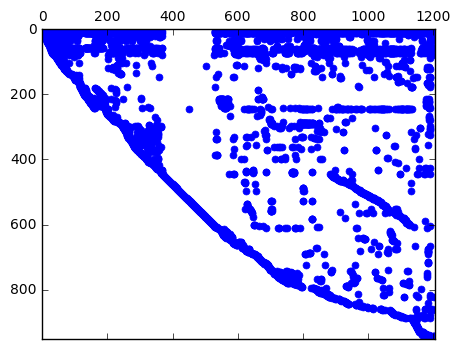

In [14]:
import matplotlib.pylab as plt
plt.spy(S, marker='.')
plt.show()

# New genes from ecoli

In [16]:
import cobra

In [23]:
# json file comes from : http://bigg.ucsd.edu/models/iJO1366
# BiGG Models: A platform for integrating, standardizing and sharing genome-scale models.

ecoli = cobra.io.load_json_model('iJO1366.json')
for gen in ecoli.genes:
    associated_ids = (i.id for i in gen.reactions)
    print("%s: %s is associated with reactions: %s" %
          (gen.name, gen.id, "{" + ", ".join(associated_ids) + "}\n"))

ompC: b2215 is associated with reactions: {CYSDtex, Ktex, 34dhpactex, ASPtex, 3AMPtex, BTNtex, G6Ptex, 3CMPtex, PItex, 3GMPtex, ETHAtex, THMtex, GAL1Ptex, ETHSO3tex, GALBDtex, DMSOtex, ETOHtex, G3PEtex, LCTStex, NAtex, G3PGtex, DMStex, H2O2tex, HXAtex, H2Otex, L_LACtex, PYRtex, TMAOtex, TMAtex, BUTSO3tex, CYStex, ALAtex, ARGtex, BUTtex, G3PItex, QUIN2tex, ORNtex, H2Stex, OROTtex, H2tex, THRPtex, G3PStex, SKMtex, SLNTtex, GALCTNLtex, SO2tex, BALAtex, NH4tex, GALCTNtex, SO3tex, AGMtex, F6Ptex, LEUtex, DIMPtex, HYXNtex, DOPAtex, Htex, DINStex, DOXRBCNtex, LALADGLUtex, CA2tex, GALCTtex, THRtex, ASCBtex, R5Ptex, PNTOtex, LALALGLUtex, SO4tex, MMETtex, NI2tex, THYMtex, 3HPPtex, PHEtex, CYTDtex, 12PPDStex, GLYtex, SUCRtex, METSOX1tex, TAURtex, METSOX2tex, DGMPtex, 3PEPTtex, 3UMPtex, TCYNTtex, DGSNtex, ASNtex, 4HOXPACDtex, AMPtex, O2Stex, ANHGMtex, CGLYtex, O2tex, ASO3tex, 23CAMPtex, ACGAtex, 23CCMPtex, SULFACtex, HIStex, 23CGMPtex, G1Ptex, GLCRtex, SELtex, METtex, CU2tex, DSERtex, 23CUMPtex, M

In [41]:
# adding the new genes: 
#       - glpF (E coli) aquaglyceroporin id: b3927
#       - glpK (E coli) glycerol kinase id: b3926
#       - glpD (E coli) glycerol 3-phosphate dehydrogenase id: b3426

gen1 = ecoli.genes.get_by_id('b3927')
gen1.reactions

frozenset({<Reaction GLYALDtpp at 0x92eca5a400>,
           <Reaction UREAtpp at 0x92ecbef240>,
           <Reaction GLYCtpp at 0x92eca629e8>})

In [1]:
print(model.reactions.GLYCtpp.reaction, 'and', ecoli.reactions.GLYCtpp.reaction)

In [47]:
ecoli.reactions.GLYALDtpp.compartments

{'c', 'p'}

In [48]:
model.reactions.GLYALDtpp.compartments

set()

In [ ]:
cobra.io.save_json_model(model, 'iCW773_Glyc.json')